In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
import collections
import itertools

# Twitter Coronavirus analysis

Data: scraped from Twitter using polish word "koronawirus" as a keyword. 


# 1. EDA

In [2]:
data = pd.read_csv('C:\\Users\\mkudl\\Documents\\fake_news\\DATA_CLEAN.csv', sep = ',', index_col = [0])
data.head()

,User,Text,Date,Favorites,Retweets,Mentions,Hashtags
0,Emill1984,"Ciekawe czasy nastaly, ze atak #koronawirus.a ...",2020-01-30 23:59:58+00:00,0,13,NaN,#koronawirus
1,DawidParzyk,Robot o nazwie Little Peanut dostarcza żywność...,2020-01-30 23:58:16+00:00,2,0,NaN,#koronawirus #wirus #chiny #wuhan #technologia...
2,SamPereira_,Marszałek Grodzki o Polsce: W Brukseli boją si...,2020-01-30 23:55:13+00:00,10,27,NaN,NaN
3,mk1977_ewa,Koronawirus i lukrecja - odpowiadam hejterom h...,2020-01-30 23:51:40+00:00,0,0,@YouTube,NaN
4,MediaNarodoweMN,"Podaj dalej, dziękujemy 👍 Czy #koronawirus jes...",2020-01-30 23:50:45+00:00,13,20,NaN,#koronawirus


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4215 entries, 0 to 4214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User       4215 non-null   object
 1   Text       4215 non-null   object
 2   Date       4215 non-null   object
 3   Favorites  4215 non-null   int64 
 4   Retweets   4215 non-null   int64 
 5   Mentions   548 non-null    object
 6   Hashtags   2140 non-null   object
dtypes: int64(2), object(5)
memory usage: 263.4+ KB


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4215 entries, 0 to 4214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   User       4215 non-null   object             
 1   Text       4215 non-null   object             
 2   Date       4215 non-null   datetime64[ns, UTC]
 3   Favorites  4215 non-null   int64              
 4   Retweets   4215 non-null   int64              
 5   Mentions   548 non-null    object             
 6   Hashtags   2140 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 263.4+ KB


Most frequently tweeting users:

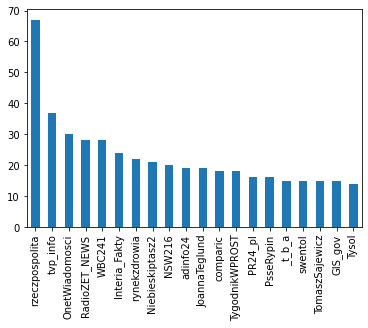

In [6]:
data['User'].value_counts()[:20].plot(kind = 'bar')

Most retweeted users (by sum and mean of their retweets):

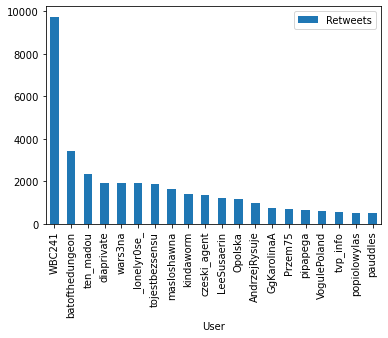

In [7]:
data[['User', 'Retweets']].groupby(['User']).sum().sort_values(by=['Retweets'], ascending = False)[:20].plot(kind='bar')

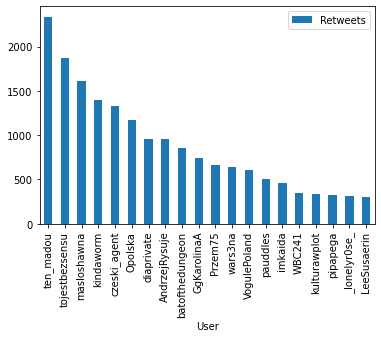

In [8]:
data[['User', 'Retweets']].groupby(['User']).mean().sort_values(by=['Retweets'], ascending = False)[:20].plot(kind='bar')

Plot of most frequent hashtags:

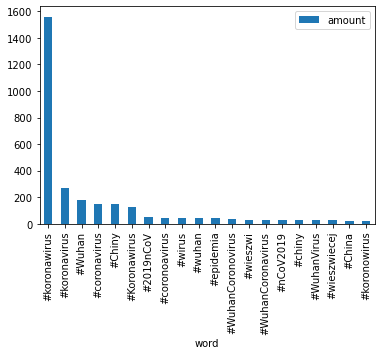

In [23]:
data.Hashtags = data.Hashtags.astype(str)
data.drop(data.index[data['Hashtags'] == 'nan'], inplace = True)
tags_clean = data['Hashtags'].str.split()
tags_clean = list(itertools.chain(*tags_clean))
counts_clean= collections.Counter(tags_clean)
most20 = pd.DataFrame(counts_clean.most_common(20), columns = ['word', 'amount'])
most20.plot(kind='bar', x='word')